STEP 1

Problem Description:

In this project we have been provided with historical sales data for 99 products across 45 outlets.Each store contains a number of departments, and we have to predict the Weekly Sales.
In addition, Walmart runs several promotional markdown events throughout the year. These markdowns precede prominent holidays, the four largest of which are the Super Bowl, Labor Day, Thanksgiving, and Christmas. The weeks including these holidays are weighted five times higher in the evaluation than non-holiday weeks. Part of the challenge presented by this competition is modeling the effects of markdowns on these holiday weeks in the absence of complete/ideal historical data.

Problem Statement:

To determine the sales in Walmart in each department during any day and how it is going to affect their sales and when by using prediction models with the given data. 

Data Wrangling: STEP 2

In [ ]:
import numpy as np 
import pandas as pd 
import seaborn as sns;
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
#accuracy
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
#pca
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
#clustering
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_blobs
#models
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
features=pd.read_csv('/content/features.csv')
train=pd.read_csv('/content/train.csv')
stores=pd.read_csv('/content/stores.csv')
test=pd.read_csv('/content/test.csv')
sample_submission=pd.read_csv('/content/sampleSubmission.csv')


FileNotFoundError: ignored

In [ ]:
features.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [ ]:
test.head()

,Store,Dept,Date,IsHoliday
0,1,1,2012-11-02,False
1,1,1,2012-11-09,False
2,1,1,2012-11-16,False
3,1,1,2012-11-23,True
4,1,1,2012-11-30,False


In [ ]:
train.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [ ]:
stores.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [ ]:
sample_submission.head()

,Id,Weekly_Sales
0,1_1_2012-11-02,0
1,1_1_2012-11-09,0
2,1_1_2012-11-16,0
3,1_1_2012-11-23,0
4,1_1_2012-11-30,0


In [ ]:
stores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Store   45 non-null     int64 
 1   Type    45 non-null     object
 2   Size    45 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 1.2+ KB


About the DATA:

stores.csv
This file contains anonymized information about the 45 stores, indicating the type and size of store.

train.csv
This is the historical training data, which covers to 2010–02–05 to 2012–11–01. Within this file you will find the following fields:

Store — the store number

Dept — the department number

Date — the week

Weekly_Sales — sales for the given department in the given store

IsHoliday — whether the week is a special holiday week

test.csv

This file is identical to train.csv, except we have withheld the weekly sales. You must predict the sales for each triplet of store, department, and date in this file.

features.csv

This file contains additional data related to the store, department, and regional activity for the given dates. It contains the following fields:

Store — the store number

Date — the week

Temperature — average temperature in the region

Fuel_Price — cost of fuel in the region

MarkDown 1–5 — anonymized data related to promotional markdowns that Walmart is running. MarkDown data is only available after Nov 2011, and is not available for all stores all the time. Any missing value is marked with an NA.

CPI — the consumer price index

Unemployment — the unemployment rate

IsHoliday — whether the week is a special holiday week

In [ ]:
#join the store and feature
fsmerge=features.merge(stores, how='inner',on='Store')
fsmerge.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Type,Size
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True,A,151315
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False,A,151315
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False,A,151315
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False,A,151315


In [ ]:
pd.DataFrame(fsmerge.dtypes,columns=['Types'])

,Types
Store,int64
Date,object
Temperature,float64
Fuel_Price,float64
MarkDown1,float64
MarkDown2,float64
MarkDown3,float64
MarkDown4,float64
MarkDown5,float64
CPI,float64


In [ ]:
pd.DataFrame(train.dtypes,columns=['Types'])

,Types
Store,int64
Dept,int64
Date,object
Weekly_Sales,float64
IsHoliday,bool


In [ ]:
pd.DataFrame(test.dtypes,columns=['Types'])

,Types
Store,int64
Dept,int64
Date,object
IsHoliday,bool


In [ ]:
#convert datatime of date
fsmerge.Date = pd.to_datetime(fsmerge.Date)
train.Date = pd.to_datetime(train.Date)


In [ ]:
fsmerge=fsmerge.merge(train,how='left')

In [ ]:
fsmerge.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Type,Size,Dept,Weekly_Sales
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315,1.0,24924.50
1,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315,2.0,50605.27
2,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315,3.0,13740.12
3,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315,4.0,39954.04
4,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315,5.0,32229.38


In [ ]:
fsmerge.describe()

,Store,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Size,Dept,Weekly_Sales
count,111823.000000,111823.000000,111823.000000,41099.000000,31922.000000,38168.00000,39910.000000,41117.000000,111238.000000,111238.000000,111823.000000,105206.000000,105206.000000
mean,7.114753,65.083309,3.267235,7162.704364,3236.969519,1577.74218,3013.952849,4704.521239,196.392514,7.120311,138426.737630,42.319858,17093.037239
std,6.430007,17.444348,0.440609,7851.468228,10480.219770,10627.69303,5421.908617,6483.425790,36.141979,1.195298,62247.581143,29.237115,24801.894314
min,1.000000,-7.290000,2.472000,-2781.450000,-265.760000,-179.26000,0.220000,-185.170000,126.064000,3.684000,34875.000000,1.000000,-1098.000000
25%,3.000000,52.790000,2.808000,2625.990000,30.700000,4.80000,426.510000,2003.640000,191.478494,6.380000,70713.000000,18.000000,2405.090000
50%,6.000000,67.530000,3.332000,5203.770000,160.940000,23.74000,1240.650000,3592.820000,214.647445,7.127000,151315.000000,35.000000,7802.655000
75%,9.000000,80.140000,3.630000,8994.040000,1594.870000,102.55000,3533.950000,5675.580000,219.532820,7.872000,202505.000000,67.000000,20976.752500
max,45.000000,101.950000,4.468000,103184.980000,104519.540000,149483.31000,67474.850000,771448.100000,228.976456,14.313000,219622.000000,99.000000,693099.360000


In [ ]:
fsmerge.isnull().sum()

Store               0
Date                0
Temperature         0
Fuel_Price          0
MarkDown1       70724
MarkDown2       79901
MarkDown3       73655
MarkDown4       71913
MarkDown5       70706
CPI               585
Unemployment      585
IsHoliday           0
Type                0
Size                0
Dept             6617
Weekly_Sales     6617
dtype: int64

In [ ]:
fsmerge=pd.get_dummies(fsmerge,columns=['Type'])
fsmerge[['MarkDown1','MarkDown2','MarkDown3','MarkDown4', 'MarkDown5']] = fsmerge[['MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5']].fillna(0)

In [ ]:
fsmerge.isnull().sum()

Store              0
Date               0
Temperature        0
Fuel_Price         0
MarkDown1          0
MarkDown2          0
MarkDown3          0
MarkDown4          0
MarkDown5          0
CPI              585
Unemployment     585
IsHoliday          0
Size               0
Dept            6617
Weekly_Sales    6617
Type_A             0
Type_B             0
Type_C             0
dtype: int64

In [ ]:
fsmerge['month']=pd.to_datetime(fsmerge['Date']).dt.month

In [ ]:
fsmerge['Year']=pd.to_datetime(fsmerge['Date']).dt.year
fsmerge['Week']=pd.to_datetime(fsmerge['Date']).dt.week

In [ ]:
fsmerge['Dept']=fsmerge['Dept'].fillna(fsmerge['Dept'].mean())

In [ ]:
fsmerge['CPI']=fsmerge['CPI'].fillna(fsmerge['CPI'].mean())


In [ ]:
fsmerge['Weekly_Sales']=fsmerge['Weekly_Sales'].fillna(fsmerge['Weekly_Sales'].mean())

In [ ]:
fsmerge['Unemployment']

0         8.106
1         8.106
2         8.106
3         8.106
4         8.106
          ...  
423320      NaN
423321      NaN
423322      NaN
423323      NaN
423324      NaN
Name: Unemployment, Length: 423325, dtype: float64

In [ ]:
fsmerge['Unemployment']=fsmerge['Unemployment'].fillna(fsmerge['Unemployment'].mean())


In [ ]:
fsmerge[['Week','Year']]=fsmerge[['Week','Year']].fillna(0)

In [ ]:
fsmerge=fsmerge.drop(columns=['Date'])

In [ ]:
fsmerge.isnull().sum()

Store           0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
IsHoliday       0
Size            0
Dept            0
Weekly_Sales    0
Type_A          0
Type_B          0
Type_C          0
month           0
Year            0
Week            0
dtype: int64

STEP 3: Exploratory Data Analysis

Comapre each  important entity with the weeklysales

In [ ]:
def scatter (fsmerge,column):
  plt.figure()
  plt.scatter(fsmerge[column],fsmerge['Weekly_Sales'])
  plt.xlabel(column)
  plt.ylabel('weeklySales')


In [ ]:
fsmerge.columns

Index(['Store', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2',
       'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment',
       'IsHoliday', 'Size', 'Dept', 'Weekly_Sales', 'Type_A', 'Type_B',
       'Type_C', 'month', 'Year', 'Week'],
      dtype='object')

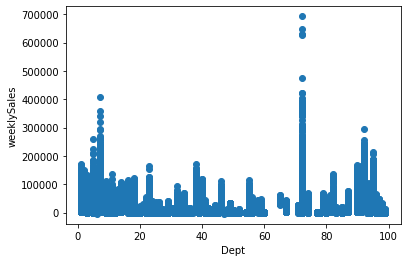

In [ ]:
scatter(fsmerge,'Dept')

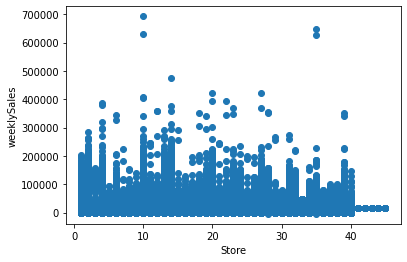

In [ ]:
scatter(fsmerge,'Store')

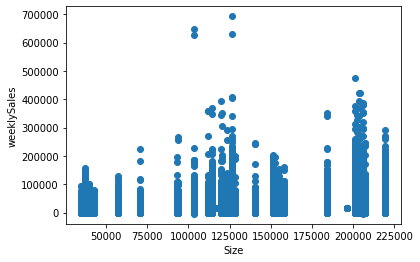

In [ ]:
scatter(fsmerge,'Size')

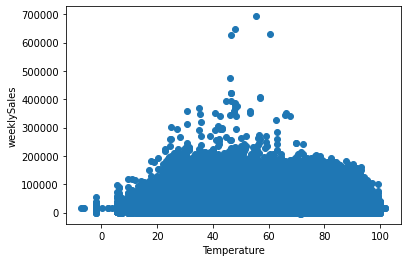

In [ ]:
scatter(fsmerge,'Temperature')

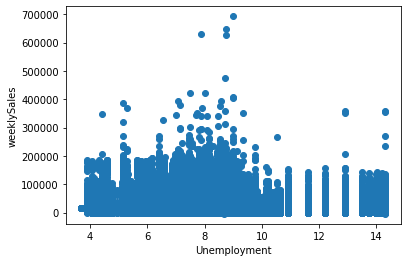

In [ ]:
scatter(fsmerge,'Unemployment')

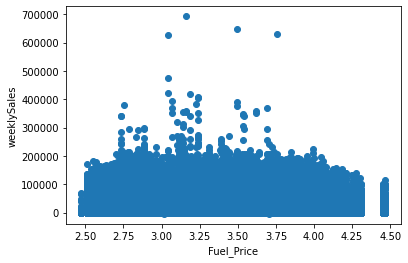

In [ ]:
scatter(fsmerge,'Fuel_Price')

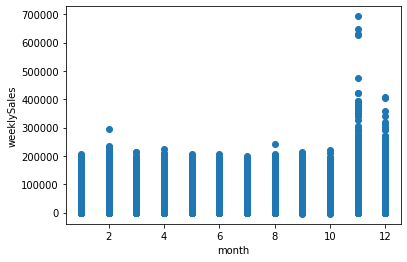

In [ ]:
scatter(fsmerge,'month')

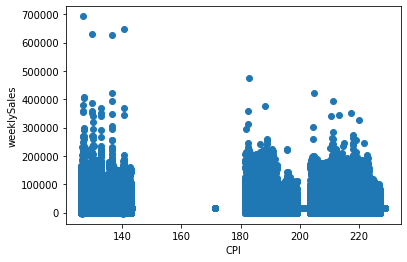

In [ ]:
scatter(fsmerge,'CPI')

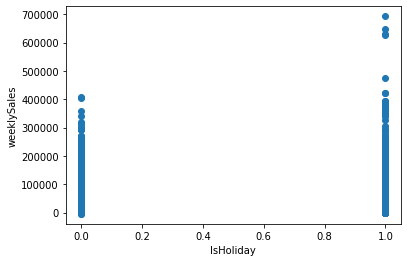

In [ ]:
scatter(fsmerge,'IsHoliday')

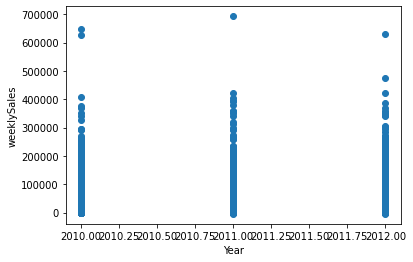

In [ ]:
scatter(fsmerge,'Year')

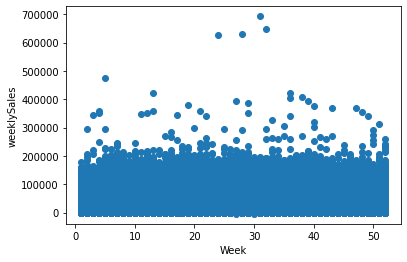

In [ ]:
scatter(fsmerge,'Week')

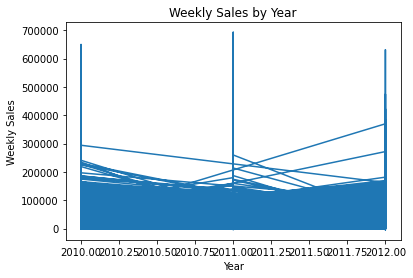

In [ ]:
x=fsmerge['Year']
y=fsmerge['Weekly_Sales']
plt.title('Weekly Sales by Year')
plt.xlabel('Year')
plt.ylabel('Weekly Sales')
plt.plot(x,y)
plt.show()

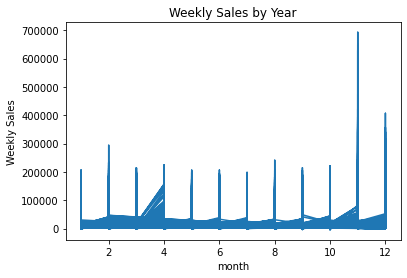

In [ ]:
x=fsmerge['month']
y=fsmerge['Weekly_Sales']
plt.title('Weekly Sales by Year')
plt.xlabel('month')
plt.ylabel('Weekly Sales')
plt.plot(x,y)
plt.show()

Step 4: Data Visualization

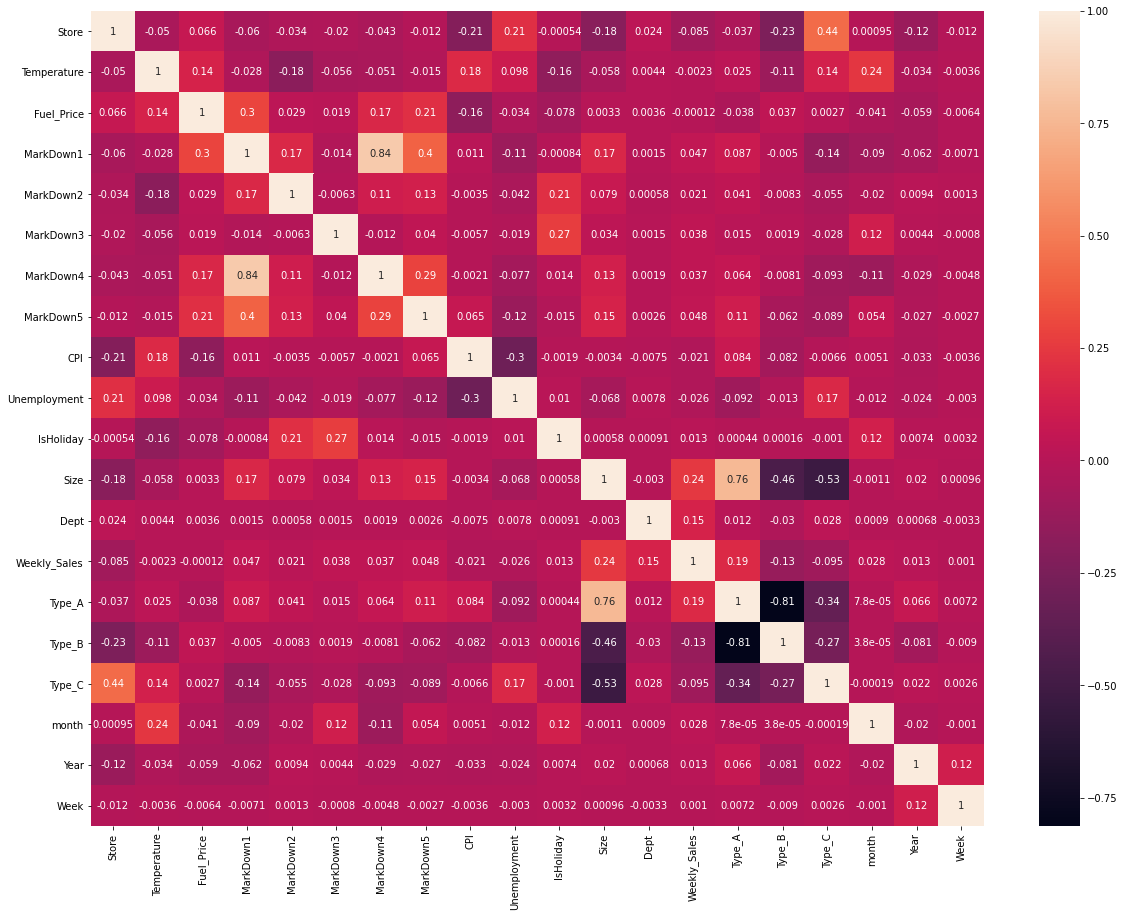

In [ ]:
plt.figure(figsize=(20,15))
sns.heatmap(fsmerge.corr(),annot=True)

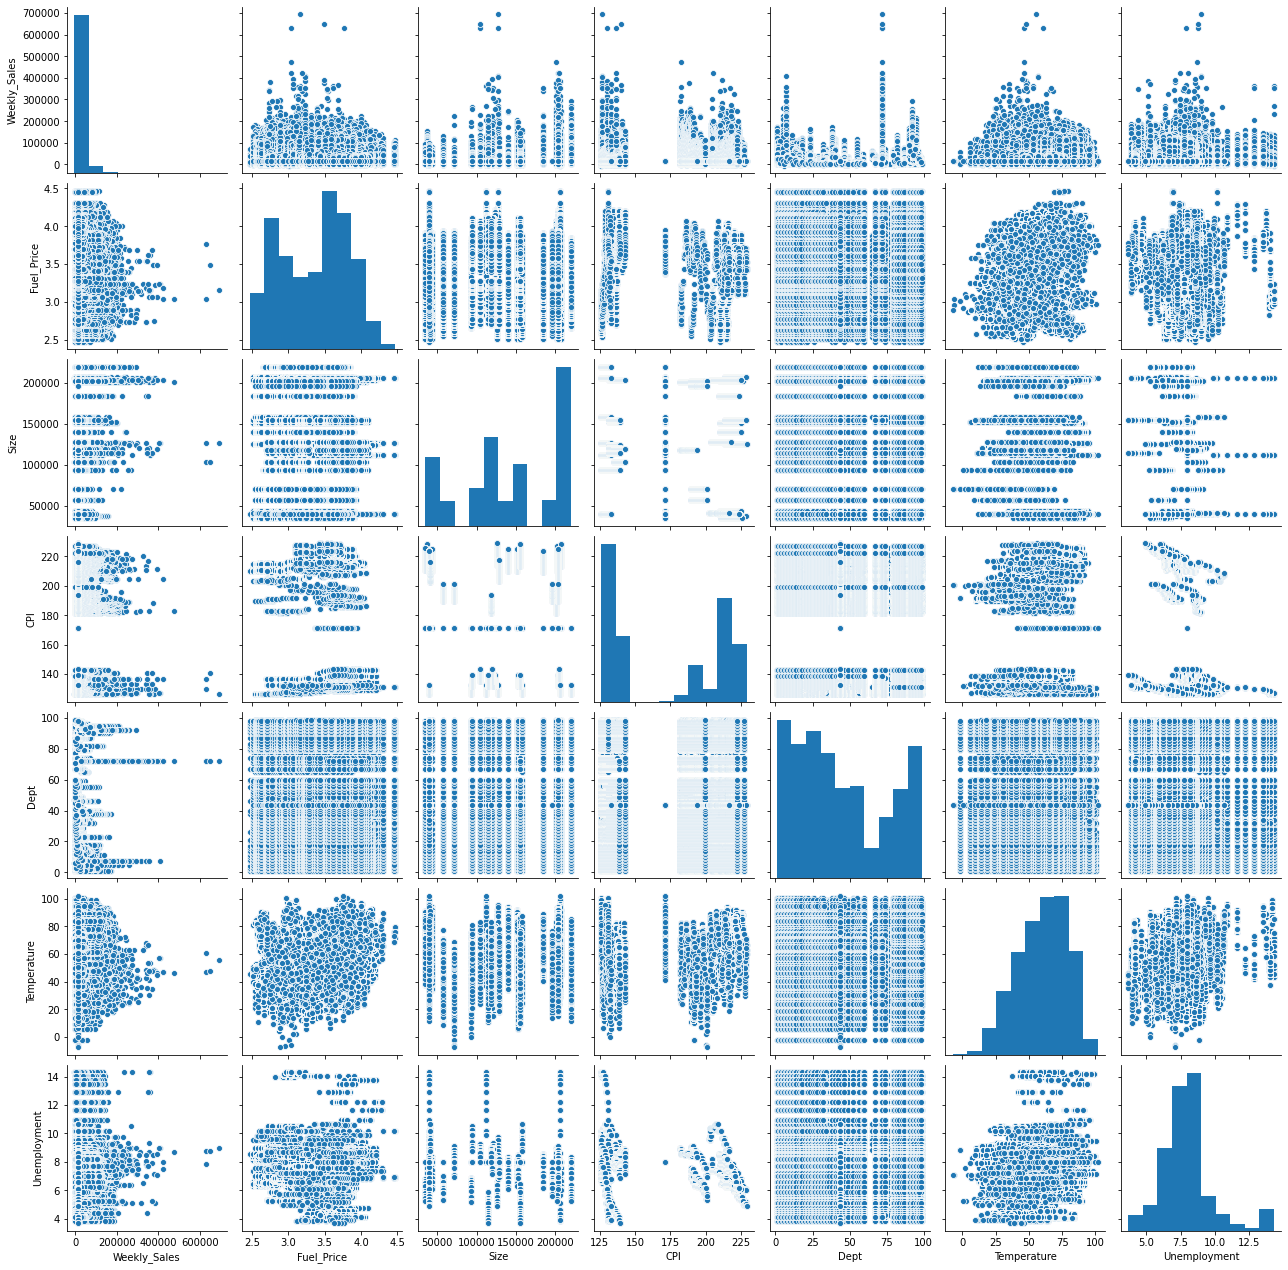

In [ ]:
sns.pairplot(fsmerge, vars=['Weekly_Sales', 'Fuel_Price', 'Size', 'CPI', 'Dept', 'Temperature', 'Unemployment'])

In [ ]:
fsmerge['Dept'].value_counts()

91.0    6435
81.0    6435
10.0    6435
3.0     6435
46.0    6435
        ... 
78.0     235
77.0     150
65.0     143
39.0      16
43.0      12
Name: Dept, Length: 82, dtype: int64

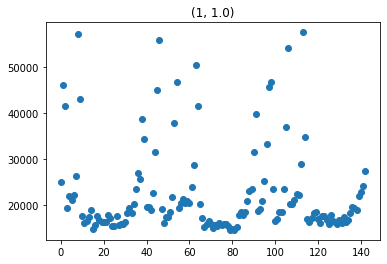

In [ ]:
for name, group in fsmerge.groupby(["Store", "Dept"]):_A
    plt.title(name)
    plt.scatter(range(len(group)), group["Weekly_Sales"])
    plt.show()
    break

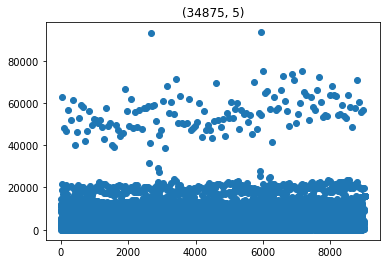

In [ ]:
for name, group in fsmerge.groupby(["Size", "Store"]):
    plt.title(name)
    plt.scatter(range(len(group)), group["Weekly_Sales"])
    plt.show()
    break

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


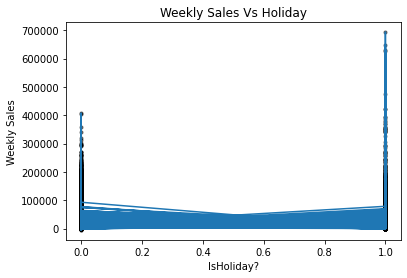

In [ ]:
x=fsmerge['IsHoliday'].values
y=fsmerge['Weekly_Sales'].values
plt.title('Weekly Sales Vs Holiday')
plt.scatter(x,y,s=np.pi*3,c=(0,0,0),alpha=0.5)
plt.xlabel('IsHoliday?')
plt.ylabel('Weekly Sales')
plt.plot(x,y)
plt.show()

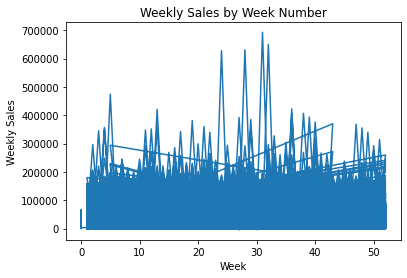

In [ ]:
x=fsmerge['Week']
y=fsmerge['Weekly_Sales']
plt.title('Weekly Sales by Week Number')
plt.xlabel('Week')
plt.ylabel('Weekly Sales')
plt.plot(x,y)
plt.show()

In [ ]:
occurences = fsmerge['IsHoliday'].value_counts().to_frame().rename(index=str, columns={'IsHoliday': 'Occurences'})
occurences

,Occurences
False,103930
True,7893


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  This is separate from the ipykernel package so we can avoid doing imports until


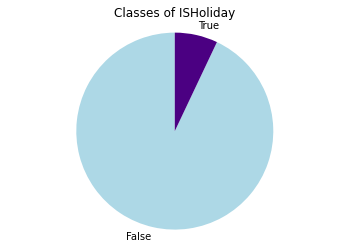

In [ ]:
colors=['lightblue','indigo',]
fig,ax=plt.subplots()
ax.pie(occurences,labels=['False','True'],startangle=90,colors=colors)
ax.axis('equal')
plt.title('Classes of ISHoliday')
plt.show()

In [ ]:
sizes=fsmerge.count()['Size'].round(1)
print(sizes)

423325


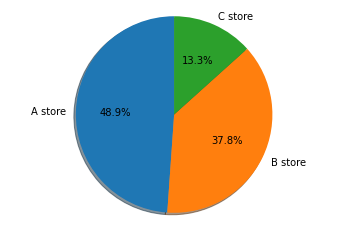

In [ ]:
labels = 'A store','B store','C store'
sizes = [(22/(45))*100,(17/(45))*100,(6/(45))*100]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

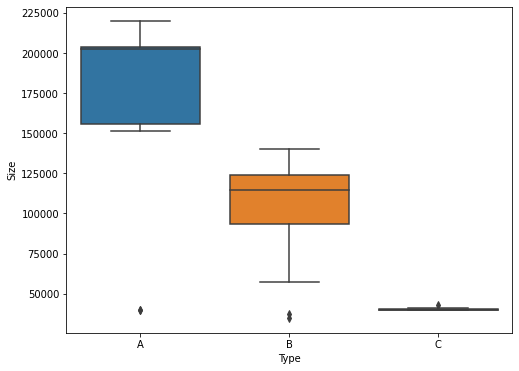

In [ ]:
store_type = pd.concat([stores['Type'], stores['Size']], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x='Type', y='Size', data=store_type)

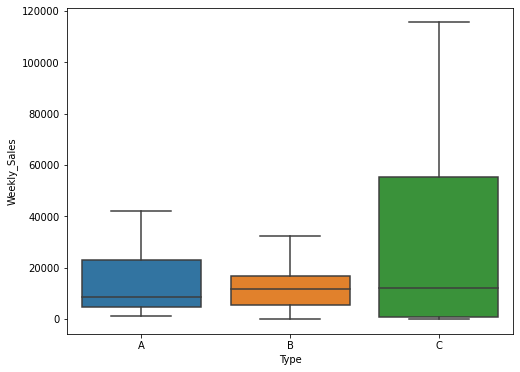

In [ ]:
store_sale = pd.concat([stores['Type'], fsmerge['Weekly_Sales']], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x='Type', y='Weekly_Sales', data=store_sale, showfliers=False)

In [ ]:
print('sales on non-holiday : ',fsmerge[fsmerge['IsHoliday']==False]['Weekly_Sales'].count().round(1))
print('sales on holiday : ',fsmerge[fsmerge['IsHoliday']==True]['Weekly_Sales'].count().round(1))

sales on non-holiday :  393529
sales on holiday :  29796


STEP 5: Data preprocessing

However Nan has been removed


In [ ]:
fsmerge.dtypes


Store             int64
Temperature     float64
Fuel_Price      float64
MarkDown1       float64
MarkDown2       float64
MarkDown3       float64
MarkDown4       float64
MarkDown5       float64
CPI             float64
Unemployment    float64
IsHoliday          bool
Size              int64
Dept            float64
Weekly_Sales    float64
Type_A            uint8
Type_B            uint8
Type_C            uint8
month             int64
Year              int64
Week              int64
dtype: object

In [ ]:
fsmerge.isnull().sum()

Store           0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
IsHoliday       0
Size            0
Dept            0
Weekly_Sales    0
Type_A          0
Type_B          0
Type_C          0
month           0
Year            0
Week            0
dtype: int64

In [ ]:
fsmerge.head()

,Store,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Size,Dept,Weekly_Sales,Type_A,Type_B,Type_C,month,Year,Week
0,1,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,151315,1.0,24924.50,1,0,0,2,2010.0,5.0
1,1,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,151315,2.0,50605.27,1,0,0,2,2010.0,6.0
2,1,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,151315,3.0,13740.12,1,0,0,2,2010.0,7.0
3,1,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,151315,4.0,39954.04,1,0,0,2,2010.0,8.0
4,1,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,151315,5.0,32229.38,1,0,0,2,2010.0,9.0


In [ ]:
fsmerge['IsHoliday'] = fsmerge['IsHoliday'].astype(int)
fsmerge[['Type_A','Type_B','Type_C']]=fsmerge[['Type_A','Type_B','Type_C']].astype(float)

In [ ]:
fsmerge.head()

,Store,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Size,Dept,Weekly_Sales,Type_A,Type_B,Type_C,month,Year,Week
0,1,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,0,151315,1.0,24924.50,1.0,0.0,0.0,2,2010,5
1,1,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,0,151315,2.0,50605.27,1.0,0.0,0.0,2,2010,5
2,1,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,0,151315,3.0,13740.12,1.0,0.0,0.0,2,2010,5
3,1,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,0,151315,4.0,39954.04,1.0,0.0,0.0,2,2010,5
4,1,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,0,151315,5.0,32229.38,1.0,0.0,0.0,2,2010,5


In [ ]:
fsmerge=fsmerge.astype(int)

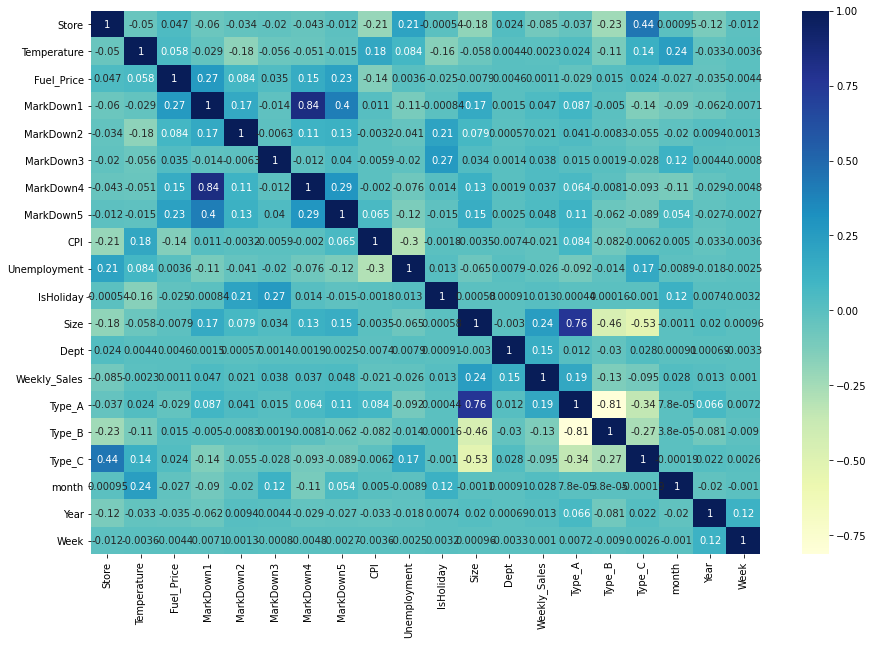

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(fsmerge.corr(),annot=True,cmap="YlGnBu")

To make this more accuracte we can reduce the markdown using PCA and the type using PCA

STEP: 6 Principal Component Analysis

In [ ]:
X=fsmerge.drop(['Weekly_Sales'],axis=1)
y=fsmerge['Weekly_Sales']

In [ ]:
#accuracy before pca
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=100, n_jobs=-1)


In [ ]:
model.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=-1, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [ ]:
print(" Train Accuracy", model.score(X_train,y_train))
print(" Test Accuracy", model.score(X_test,y_test))

 Train Accuracy 0.9951270154882724
 Test Accuracy 0.9635780103403797


In [ ]:
test.head()

,Store,Dept,Date,IsHoliday
0,1,1,2012-11-02,False
1,1,1,2012-11-09,False
2,1,1,2012-11-16,False
3,1,1,2012-11-23,True
4,1,1,2012-11-30,False


In [ ]:
le = LabelEncoder()

In [ ]:
trans=le.fit_transform(fsmerge['Weekly_Sales'])

In [ ]:
fsmerge['Weekly_Sales']=trans

In [ ]:
pca = PCA(n_components=1)


In [ ]:
types_abc = pca.fit_transform(fsmerge[['Type_A','Type_B','Type_C']])

In [ ]:
types_abc.shape

(423325, 1)

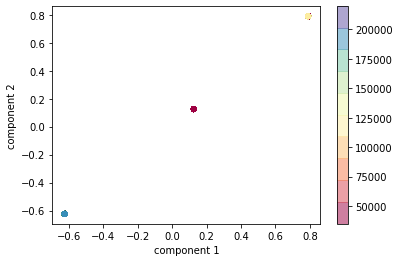

In [ ]:
plt.scatter(types_abc[:, 0],types_abc[:,:],
            c=fsmerge['Size'], edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('Spectral', 10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();

In [ ]:
markD=pca.fit_transform(fsmerge[['MarkDown1',	'MarkDown2',	'MarkDown3',	'MarkDown4','MarkDown5']])

In [ ]:
markD.shape

(423325, 1)

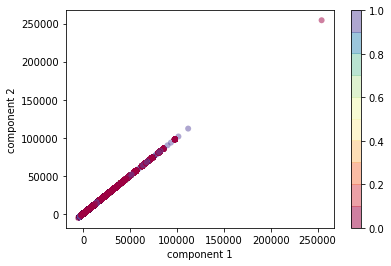

In [ ]:
plt.scatter(markD[:, 0],markD[:,:],
            c=fsmerge['IsHoliday'], edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('Spectral', 10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();

In [ ]:
fsmerge.head()

,Store,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Size,Dept,Weekly_Sales,Type_A,Type_B,Type_C,month,Year,Week,type
0,1,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,0,151315,1.0,24924.50,1.0,0.0,0.0,2,2010,5,-0.623938
1,1,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,0,151315,2.0,50605.27,1.0,0.0,0.0,2,2010,5,-0.623938
2,1,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,0,151315,3.0,13740.12,1.0,0.0,0.0,2,2010,5,-0.623938
3,1,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,0,151315,4.0,39954.04,1.0,0.0,0.0,2,2010,5,-0.623938
4,1,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,0,151315,5.0,32229.38,1.0,0.0,0.0,2,2010,5,-0.623938


In [ ]:
fsmergepca=fsmerge
fsmergepca.head()

,Store,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Size,Dept,Weekly_Sales,Type_A,Type_B,Type_C,month,Year,Week
0,1,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,151315,1.0,274803,1,0,0,2,2010,5
1,1,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,151315,2.0,328096,1,0,0,2,2010,5
2,1,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,151315,3.0,214830,1,0,0,2,2010,5
3,1,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,151315,4.0,312668,1,0,0,2,2010,5
4,1,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,151315,5.0,295974,1,0,0,2,2010,5


In [ ]:
fsmergepca['mark']=pd.DataFrame(markD)

In [ ]:
fsmergepca['type']=pd.DataFrame(types_abc)

In [ ]:
fsmergepca

,Store,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Size,Dept,Weekly_Sales,Type_A,Type_B,Type_C,month,Year,Week,mark,type
0,1,42.31,2.572,0.00,0.00,0.00,0.00,0.00,211.096358,8.106000,False,151315,1.000000,274803,1,0,0,2,2010,5,-3311.157204,-0.623938
1,1,42.31,2.572,0.00,0.00,0.00,0.00,0.00,211.096358,8.106000,False,151315,2.000000,328096,1,0,0,2,2010,5,-3311.157204,-0.623938
2,1,42.31,2.572,0.00,0.00,0.00,0.00,0.00,211.096358,8.106000,False,151315,3.000000,214830,1,0,0,2,2010,5,-3311.157204,-0.623938
3,1,42.31,2.572,0.00,0.00,0.00,0.00,0.00,211.096358,8.106000,False,151315,4.000000,312668,1,0,0,2,2010,5,-3311.157204,-0.623938
4,1,42.31,2.572,0.00,0.00,0.00,0.00,0.00,211.096358,8.106000,False,151315,5.000000,295974,1,0,0,2,2010,5,-3311.157204,-0.623938
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
423320,45,76.05,3.639,4842.29,975.03,3.00,2449.97,3169.69,171.218863,7.957296,False,118221,44.260317,230505,0,1,0,6,2013,26,2913.212434,0.789394
423321,45,77.50,3.614,9090.48,2268.58,582.74,5797.47,1514.93,171.218863,7.957296,False,118221,44.260317,230505,0,1,0,7,2013,27,7587.599833,0.789394
423322,45,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,171.218863,7.957296,False,118221,44.260317,230505,0,1,0,7,2013,28,1146.518175,0.789394
423323,45,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,171.218863,7.957296,False,118221,44.260317,230505,0,1,0,7,2013,29,-214.180949,0.789394


In [ ]:
fsmergepca=fsmergepca.drop(['MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5','Type_A','Type_C','Type_B',],axis=1)


In [ ]:
pca.explained_variance_ratio_

In [ ]:
fsmergepca.shape

(423325, 14)

In [ ]:
X=fsmergepca.drop(['Weekly_Sales'],axis=1)
y=fsmergepca['Weekly_Sales']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=100, n_jobs=-1)


In [ ]:
model.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=-1, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [ ]:
print(" Train Accuracy", model.score(X_train,y_train))
print(" Test Accuracy", model.score(X_test,y_test))

 Train Accuracy 0.9966250099944652
 Test Accuracy 0.9724036128805874


We can use PCA trained data as there is slight increase in accuracy

In [ ]:
fsmerge['Type_C'].value_counts()

0    380494
1     42831
Name: Type_C, dtype: int64

In [ ]:
fsmergepca.head()

,Store,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday,Size,Dept,Weekly_Sales,month,Year,Week,type,mark
0,1,42.31,2.572,211.096358,8.106,0,151315,1.0,24924.50,2,2010,5,-0.623938,-3311.157204
1,1,42.31,2.572,211.096358,8.106,0,151315,2.0,50605.27,2,2010,5,-0.623938,-3311.157204
2,1,42.31,2.572,211.096358,8.106,0,151315,3.0,13740.12,2,2010,5,-0.623938,-3311.157204
3,1,42.31,2.572,211.096358,8.106,0,151315,4.0,39954.04,2,2010,5,-0.623938,-3311.157204
4,1,42.31,2.572,211.096358,8.106,0,151315,5.0,32229.38,2,2010,5,-0.623938,-3311.157204


In [ ]:
fsmergepca['type'].value_counts()

-0.623938    216334
 0.789394    164158
 0.125958     42831
-0.623938         1
-0.623938         1
Name: type, dtype: int64

Step 7: Feature Engineering

In [ ]:
test.head()

,Store,Dept,Date,IsHoliday
0,1,1,2012-11-02,False
1,1,1,2012-11-09,False
2,1,1,2012-11-16,False
3,1,1,2012-11-23,True
4,1,1,2012-11-30,False


In [ ]:
test = test.merge(stores, how='left').merge(features, how='left')

In [ ]:
test.head()

,Store,Dept,Date,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,1,2012-11-02,False,A,151315,55.32,3.386,6766.44,5147.70,50.82,3639.90,2737.42,223.462779,6.573
1,1,1,2012-11-09,False,A,151315,61.24,3.314,11421.32,3370.89,40.28,4646.79,6154.16,223.481307,6.573
2,1,1,2012-11-16,False,A,151315,52.92,3.252,9696.28,292.10,103.78,1133.15,6612.69,223.512911,6.573
3,1,1,2012-11-23,True,A,151315,56.23,3.211,883.59,4.17,74910.32,209.91,303.32,223.561947,6.573
4,1,1,2012-11-30,False,A,151315,52.34,3.207,2460.03,NaN,3838.35,150.57,6966.34,223.610984,6.573


In [ ]:
test = pd.get_dummies(test, columns=["Type"])
test[['MarkDown1','MarkDown2','MarkDown3','MarkDown4', 'MarkDown5']] = test[['MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5']].fillna(0)
test = test.fillna(0)
column_date = test['Date']

test['Month'] = pd.to_datetime(test['Date']).dt.month
test['Year'] = pd.to_datetime(test['Date']).dt.year
test['Week'] = pd.to_datetime(test['Date']).dt.week


In [ ]:
test['IsHoliday'] = test['IsHoliday'].astype(int)
test['markdown']=pd.DataFrame(markD)
test['type']=pd.DataFrame(types_abc)
test=test.drop(['MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5','Type_A','Type_C','Type_B',],axis=1)

test

,Store,Dept,Date,IsHoliday,Size,Temperature,Fuel_Price,CPI,Unemployment,Month,Year,Week,markdown,type
0,1,1,2012-11-02,0,151315,55.32,3.386,223.462779,6.573,11,2012,44,-3311.157204,-0.623938
1,1,1,2012-11-09,0,151315,61.24,3.314,223.481307,6.573,11,2012,45,-3311.157204,-0.623938
2,1,1,2012-11-16,0,151315,52.92,3.252,223.512911,6.573,11,2012,46,-3311.157204,-0.623938
3,1,1,2012-11-23,1,151315,56.23,3.211,223.561947,6.573,11,2012,47,-3311.157204,-0.623938
4,1,1,2012-11-30,0,151315,52.34,3.207,223.610984,6.573,11,2012,48,-3311.157204,-0.623938
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115059,45,98,2013-06-28,0,118221,76.05,3.639,0.000000,0.000,6,2013,26,16923.488520,0.789394
115060,45,98,2013-07-05,0,118221,77.50,3.614,0.000000,0.000,7,2013,27,16923.488520,0.789394
115061,45,98,2013-07-12,0,118221,79.37,3.614,0.000000,0.000,7,2013,28,16923.488520,0.789394
115062,45,98,2013-07-19,0,118221,82.84,3.737,0.000000,0.000,7,2013,29,16923.488520,0.789394


Step 8: Clusters Analysis

In [ ]:
sc = StandardScaler()
sc.fit(fsmerge)
df = sc.transform(fsmerge)

In [ ]:
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(df)
    Sum_of_squared_distances.append(km.inertia_)

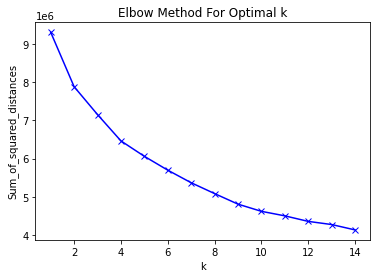

In [ ]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [ ]:
X=pd.DataFrame(fsmerge)

In [ ]:
X.columns

Index(['Store', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2',
       'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment',
       'IsHoliday', 'Size', 'Dept', 'Weekly_Sales', 'Type_A', 'Type_B',
       'Type_C', 'month', 'Year', 'Week', 'mark', 'type'],
      dtype='object')

In [ ]:
y=X['Weekly_Sales']

In [ ]:
X=X.drop(columns=['Weekly_Sales'])

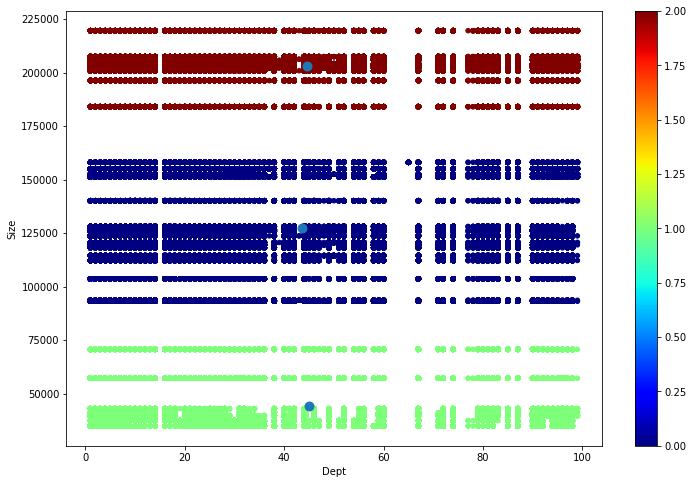

In [ ]:
kmeans = KMeans(n_clusters=3, init = 'random', max_iter = 1, random_state = 5).fit(X)
centroids_df = pd.DataFrame(kmeans.cluster_centers_, columns = list(X.columns.values))
fig, ax = plt.subplots(1, 1)
X.plot.scatter(x = 'Dept', y = 'Size', c= kmeans.labels_, figsize=(12,8), colormap='jet', ax=ax, mark_right=False)
centroids_df.plot.scatter(x = 'Dept', y = 'Size', ax = ax,  s = 80, mark_right=False)

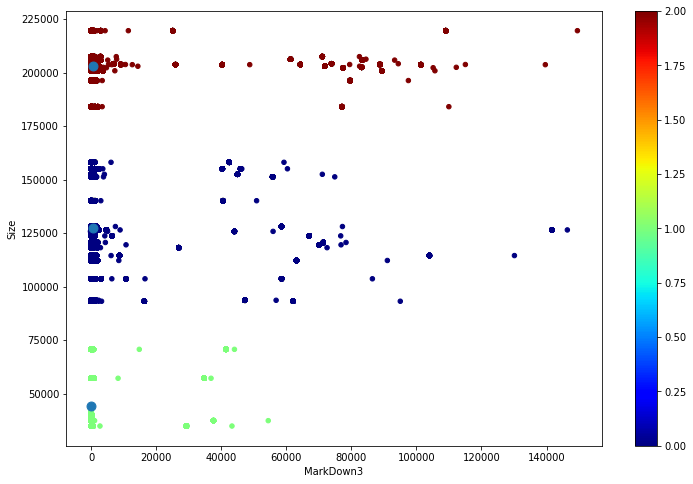

In [ ]:
centroids_df = pd.DataFrame(kmeans.cluster_centers_, columns = list(X.columns.values))
fig, ax = plt.subplots(1, 1)
X.plot.scatter(x = 'MarkDown3', y = 'Size', c= kmeans.labels_, figsize=(12,8), colormap='jet', ax=ax, mark_right=False)
centroids_df.plot.scatter(x = 'MarkDown3', y = 'Size', ax = ax,  s = 80, mark_right=False)

In [ ]:
X=fsmergepca
X.head()

,Store,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday,Size,Dept,Weekly_Sales,month,Year,Week,mark,type
0,1,42.31,2.572,211.096358,8.106,False,151315,1.0,24924.50,2,2010,5,-3311.157204,-0.623938
1,1,42.31,2.572,211.096358,8.106,False,151315,2.0,50605.27,2,2010,5,-3311.157204,-0.623938
2,1,42.31,2.572,211.096358,8.106,False,151315,3.0,13740.12,2,2010,5,-3311.157204,-0.623938
3,1,42.31,2.572,211.096358,8.106,False,151315,4.0,39954.04,2,2010,5,-3311.157204,-0.623938
4,1,42.31,2.572,211.096358,8.106,False,151315,5.0,32229.38,2,2010,5,-3311.157204,-0.623938


In [ ]:
X['IsHoliday']=X['IsHoliday'].astype(int)

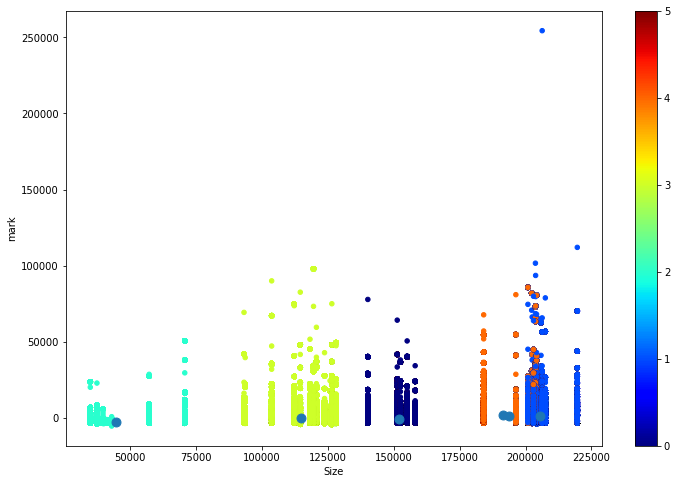

In [ ]:
kmeans = KMeans(n_clusters=6, init = 'random', max_iter = 1, random_state = 5).fit(X)
centroids_df = pd.DataFrame(kmeans.cluster_centers_, columns = list(X.columns.values))
fig, ax = plt.subplots(1, 1)
X.plot.scatter(x = 'Size', y = 'mark', c= kmeans.labels_, figsize=(12,8), colormap='jet', ax=ax, mark_right=False)
centroids_df.plot.scatter(x = 'Size', y = 'mark', ax = ax,  s = 80, mark_right=False)

In [ ]:
X=pd.DataFrame(fsmerge)

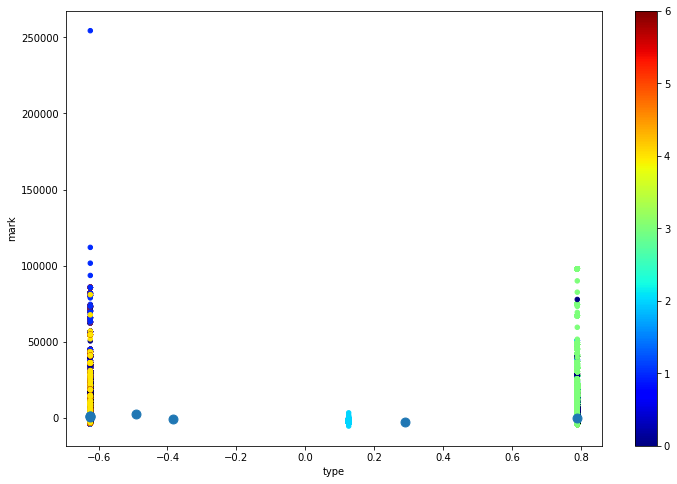

In [ ]:
kmeans = KMeans(n_clusters=7, init = 'random', max_iter = 1, random_state = 5).fit(X)
centroids_df = pd.DataFrame(kmeans.cluster_centers_, columns = list(X.columns.values))
fig, ax = plt.subplots(1, 1)
X.plot.scatter(x = 'type', y = 'mark', c= kmeans.labels_, figsize=(12,8), colormap='jet', ax=ax, mark_right=False)
centroids_df.plot.scatter(x = 'type', y = 'mark', ax = ax,  s = 80, mark_right=False)

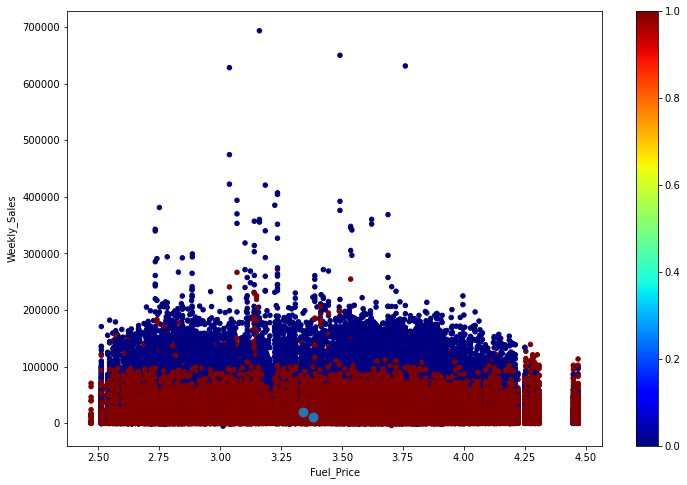

In [ ]:
kmeans = KMeans(n_clusters=2, init = 'random', max_iter = 1, random_state = 5).fit(X)
centroids_df = pd.DataFrame(kmeans.cluster_centers_, columns = list(X.columns.values))
fig, ax = plt.subplots(1, 1)
X.plot.scatter(x = 'Fuel_Price', y = 'Weekly_Sales', c= kmeans.labels_, figsize=(12,8), colormap='jet', ax=ax, mark_right=False)
centroids_df.plot.scatter(x = 'Fuel_Price', y = 'Weekly_Sales', ax = ax,  s = 80, mark_right=False)

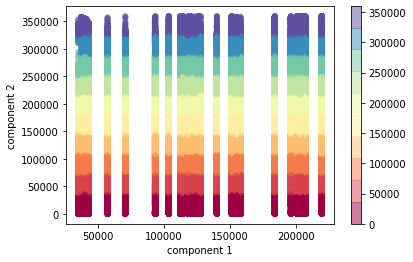

In [ ]:
plt.scatter(fsmerge['Size'],fsmerge['Weekly_Sales'], 
            c=fsmerge['Weekly_Sales'], edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('Spectral', 10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();

Step 9: Model Building

In [ ]:
fsmergepca['IsHoliday']=fsmergepca['IsHoliday'].astype(int)

In [ ]:
fsmergepca.head()

,Store,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday,Size,Dept,Weekly_Sales,month,Year,Week,mark,type
0,1,42.31,2.572,211.096358,8.106,0,151315,1.0,274803,2,2010,5,-3311.157204,-0.623938
1,1,42.31,2.572,211.096358,8.106,0,151315,2.0,328096,2,2010,5,-3311.157204,-0.623938
2,1,42.31,2.572,211.096358,8.106,0,151315,3.0,214830,2,2010,5,-3311.157204,-0.623938
3,1,42.31,2.572,211.096358,8.106,0,151315,4.0,312668,2,2010,5,-3311.157204,-0.623938
4,1,42.31,2.572,211.096358,8.106,0,151315,5.0,295974,2,2010,5,-3311.157204,-0.623938


In [ ]:
X=fsmergepca.drop(columns=['Weekly_Sales'])
y=fsmergepca['Weekly_Sales']

In [ ]:
X_train,X_test,y_train,y_test=train_test_split( X, y, test_size=0.20, random_state=0)

In [ ]:
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

KNN Regressor

In [ ]:
knn = KNeighborsRegressor(n_neighbors=10,n_jobs=4)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)

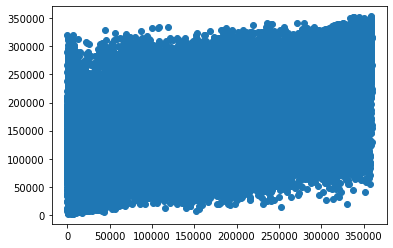

In [ ]:
plt.scatter(y_test,y_pred)
plt.show()

In [ ]:
accuracy=knn.score(X_test,y_test)

In [ ]:
accuracy

0.3640151453831937

In [ ]:
dt = DecisionTreeRegressor(random_state=0)
dt.fit(X_train,y_train)
y_pred = dt.predict(X_test)

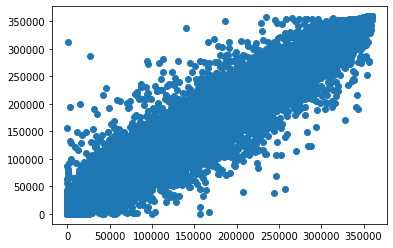

In [ ]:
plt.scatter(y_test,y_pred)
plt.show()

In [ ]:
accuracy1=dt.score(X_test,y_test)

In [ ]:
accuracy1

0.979160710380619

In [ ]:
rfr = RandomForestRegressor(n_estimators = 400,max_depth=15,n_jobs=5)        
rfr.fit(X_train,y_train)
y_pred=rfr.predict(X_test)

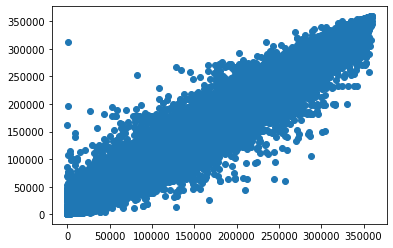

In [ ]:
plt.scatter(y_test,y_pred)
plt.show()

In [ ]:
accuracy2=rfr.score(X_test,y_test)

In [ ]:
accuracy2

0.9776897234441211

In [ ]:
etr = ExtraTreesRegressor(n_estimators=30,n_jobs=4) 
etr.fit(X_train,y_train)
y_pred=etr.predict(X_test)

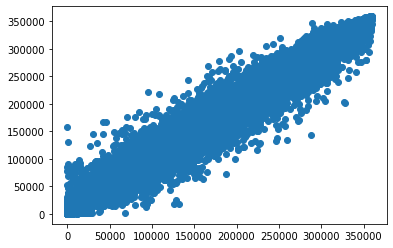

In [ ]:
plt.scatter(y_test,y_pred)
plt.show()

In [ ]:
accuracy3=etr.score(X_test,y_test)

In [ ]:
accuracy3

0.9883590536007937